# **TMNIST DATASET PREDICTION**


The first column contains represents the font name (ex-Chivo-Italic, Sen-Bold), the second column represents the label (a number from 0-9) and the remaining 784 elements represent the grayscale pixel values (from 0-255) for the 28x28 pixel image.

## **Linking the Dataset**

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"poornachandrakongara","key":"7a14e14f1b88ab76b5d1911df8624c81"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
!kaggle datasets download -d nimishmagre/tmnist-typeface-mnist

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                      Spotify and Youtube                              9MB  2023-03-20 15:43:25           6303        244  1.0              
erdemtaha/cancer-data                                      Cancer Data                                     49KB  2023-03-22 07:57:00           2106         53  1.0              
ulrikthygepedersen/fastfood-nutrition                      Fastfood Nutrition                              12KB  2023-03-21 10:02:41           2245         45  1.0              
lokeshparab/amazon-products-dataset                        Amazon Products Sales Dataset 2023              80M

In [3]:
!unzip /content/tmnist-typeface-mnist.zip

Archive:  /content/tmnist-typeface-mnist.zip
  inflating: TMNIST_Data.csv         


## **Importing Required Libraries**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
import warnings
warnings.filterwarnings("ignore")

## **Reading the Dataset**


In [5]:
#reading the dataset
df=pd.read_csv('/content/TMNIST_Data.csv')
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Key Statistics from the DataFrame: Rows, Columns, Classes, and Fonts**


*   Rows represent individual data points, and columns represent the different attributes or features associated with each data point. It helps us understand the size and structure of the data.
*   Unique classes (categories or groups) in the 'labels' represent the different types of objects or categories we are trying to classify or predict. It also displays the unique labels present in the 'labels' column, which gives us an idea of the different categories in the data.
*   Font column likely represents the different font styles used in the dataset, which could be important for understanding the diversity of fonts used in the data. It helps us identify how many different types of fonts are present in the data.



In [7]:
num_rows, num_cols = df.shape
#Number of rows in dataframe
print('The number of rows:', num_rows)
#Number of columns in dataframe
print('The number of columns:', num_cols)

#
num_classes = df['labels'].nunique()
#Total number of unique labels
print('The number of classes:', num_classes)
print('The labels are:', df['labels'].unique())

#Total number of unique fonts
num_fonts = df['names'].nunique()
print('The number of different types of fonts:', num_fonts)

The number of rows: 29900
The number of columns: 786
The number of classes: 10
The labels are: [2 8 4 3 1 6 5 9 7 0]
The number of different types of fonts: 2990


## **Visualizing Image Data with Class Labels from DataFrame**



*   **Feature columns and class column:** Code defines what data attributes to use as input features (feature columns) and what category to predict (class column).

*   **Displaying images:** Code uses matplotlib to show a set of images with their corresponding class labels for visual understanding.

*   **Printing shape of feature matrix and target labels:** Code displays the dimensions of the data, including the number of data points and features, and the number of target labels for reference.



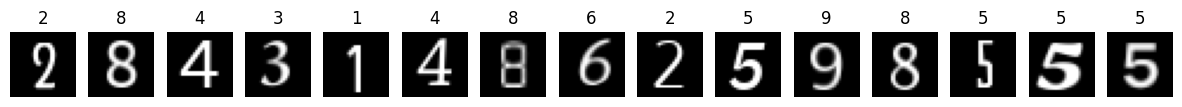

(29900, 784)
(29900,)


In [17]:
class_column = 'labels'  
feature_columns = ['names']  

X = df.drop(feature_columns + [class_column], axis=1)
y = df[class_column]  # Define the y variable as the class column

fig, axes = plt.subplots(1, 15, figsize=(15, 6))
for i, ax in enumerate(axes):
    ax.set_title(y.iloc[i])  # Update to use the y variable for class labels
    ax.imshow(X.values[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    ax.axis('off')
plt.show()

print(X.shape)  # Print the shape of X (the feature matrix)
print(y.shape)  # Print the shape of y (the target labels)

## **Splitting Data into Train and Test Sets**

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [23]:
print(X_train)
print(X_test)

       1  2  3  4  5  6  7  8  9  10  ...  775  776  777  778  779  780  781  \
1256   0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
15610  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
4716   0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
12927  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
10980  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
...   .. .. .. .. .. .. .. .. ..  ..  ...  ...  ...  ...  ...  ...  ...  ...   
29802  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
5390   0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
860    0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
15795  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   
23654  0  0  0  0  0  0  0  0  0   0  ...    0    0    0    0    0    0    0   

       782  783  784  
1256     0    0 

In [24]:
print(Y_train)
print(Y_test)


1256     9
15610    0
4716     8
12927    5
10980    8
        ..
29802    1
5390     6
860      1
15795    7
23654    1
Name: labels, Length: 23920, dtype: int64
15756    3
19617    5
18973    8
16397    9
16366    0
        ..
708      9
23587    8
27362    3
20592    8
9934     5
Name: labels, Length: 5980, dtype: int64


## **Normalizing Pixel Values**

We scale down the pixel values of our images to a range between 0 and 1 to improve the performance of our neural network models.

In [25]:
#To improve the performance of our neural network models, we normalize the pixel values,
X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

## **Converting Class Labels to Binary Representation using One Hot Encoding**








*   Encoding the categorical labels of our data using a one-hot encoding technique to represent them as binary values, which can be easily understood by the neural network models.
*   Convert the labels into a numerical format that the neural network can process, improving its ability to learn and make accurate predictions.



In [26]:
#Feature digitization using one hot encoder
enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
Y_train=enc.fit_transform(Y_train.values.reshape(-1,1))
Y_test=  enc.transform(Y_test.values.reshape(-1,1))

## **Reshaping Grayscale Images**

Reshaping the grayscale images from their original shape into a standardized size of 28x28 pixels, which is a common format for image recognition tasks.

In [30]:
# Reshape grayscale images to 28x28
image_height = 28
image_width = 28

X_train = X_train.reshape(X_train.shape[0], image_height, image_width)
X_test = X_test.reshape(X_test.shape[0], image_height, image_width)


## **Building a Neural Network**



*  Creating a basic neural network model using the Keras Sequential API, which allows us to stack layers on top of each other to create a feedforward neural network.
*   The model consists of multiple dense (fully connected) layers with different numbers of hidden units and activation functions (ReLU) to learn complex patterns from the input data.
* The last layer of the model uses the softmax activation function to output predicted probabilities for each class in the dataset, and the Adam optimizer is used to optimize the model's parameters during training. The model's architecture and summary are displayed for reference.



In [31]:
#we choose a basic Neural Network to finish our mission
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


## **Fitting the model**

In [35]:
#fitting the model
model_history=model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test), verbose=2,batch_size=512)

Epoch 1/10
47/47 - 1s - loss: 2.4511e-04 - accuracy: 1.0000 - val_loss: 0.0947 - val_accuracy: 0.9881 - 1s/epoch - 30ms/step
Epoch 2/10
47/47 - 1s - loss: 2.1386e-04 - accuracy: 1.0000 - val_loss: 0.0960 - val_accuracy: 0.9880 - 1s/epoch - 27ms/step
Epoch 3/10
47/47 - 1s - loss: 2.0758e-04 - accuracy: 1.0000 - val_loss: 0.0966 - val_accuracy: 0.9880 - 1s/epoch - 27ms/step
Epoch 4/10
47/47 - 1s - loss: 2.0168e-04 - accuracy: 1.0000 - val_loss: 0.0976 - val_accuracy: 0.9880 - 1s/epoch - 27ms/step
Epoch 5/10
47/47 - 1s - loss: 1.9120e-04 - accuracy: 1.0000 - val_loss: 0.0977 - val_accuracy: 0.9881 - 1s/epoch - 27ms/step
Epoch 6/10
47/47 - 1s - loss: 1.8360e-04 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9880 - 1s/epoch - 31ms/step
Epoch 7/10
47/47 - 2s - loss: 1.3962e-04 - accuracy: 1.0000 - val_loss: 0.1008 - val_accuracy: 0.9880 - 2s/epoch - 46ms/step
Epoch 8/10
47/47 - 1s - loss: 1.6468e-04 - accuracy: 1.0000 - val_loss: 0.1007 - val_accuracy: 0.9880 - 1s/epoch - 28ms/step


## **Calculating Accuracy & Loss**

In [38]:
# Assuming you have already trained your model and obtained predictions
y_pred = model.predict(X_test)

# Calculate accuracy
test_accuracy = model.evaluate(X_test, Y_test)[1]

# Calculate loss
test_loss = model.evaluate(X_test, Y_test)[0]

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

187/187 [==============================] - 1s 7ms/step - loss: 0.1007 - accuracy: 0.9881
Test loss: 0.1007225438952446
Test accuracy: 0.9881271123886108


## **Accuracy and Loss vs Epochs Graphs**

Plotting accuracy and loss values of a neural network model during training, using two subplots to show the trends over epochs.

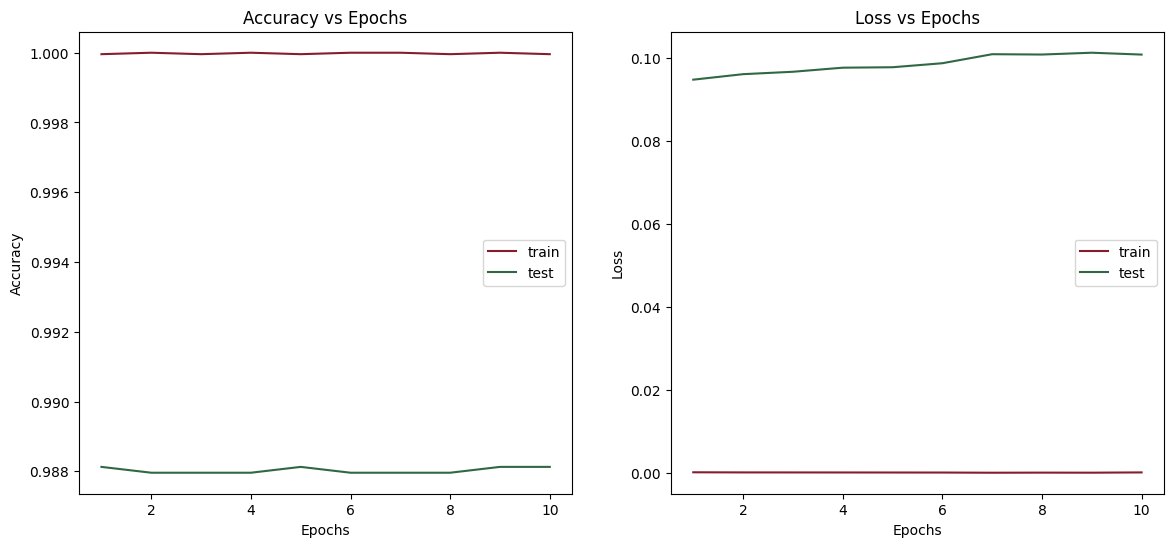

In [39]:
# Extract accuracy and loss values from model_history
accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy vs epochs
axs[0].plot(epochs, accuracy, label='train', color='#851D2D')
axs[0].plot(epochs, val_accuracy, label='test', color='#306844')
axs[0].set_title('Accuracy vs Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss vs epochs
axs[1].plot(epochs, loss, label='train', color='#851D2D')
axs[1].plot(epochs, val_loss, label='test', color='#306844')
axs[1].set_title('Loss vs Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

# Display the plots
plt.show()

# **Conclusion**
The neural network model achieved a very low loss (2.1592e-04) and a high accuracy (1.0000) on the training data, indicating it has learned the patterns in the data very well. The model also performed well on the test data, with a test loss of 0.1007225438952446 and a test accuracy of 0.9881271123886108, suggesting good generalization performance. Overall, the model can be considered successful in accurately predicting the labels for the given data.

# **References**
1. https://en.wikipedia.org/wiki/Convolutional_neural_network
2. https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/
3. https://towardsdatascience.com/using-convolutional-neural-network-for-image-classification-5997bfd0ede4
4. https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6


# **LICENSE**

MIT License

Copyright (c) 2023 Poornachandra Kongara



Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

<br>

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

<br>



THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.